In [ ]:
import numpy as np
from ann_layers.ann import ANN
from data_loaders.data_loader import load_dataset
from utils.visualization import plot_training_history
from ann_layers.dense import Dense
from utils.activation import Tanh, LeakyReLU, Softmax
from ann_layers.dropout import Dropout
from ann_layers.batch_normalization import BatchNormalization

In [2]:
print("Loading datasets...")
X_train, y_train = load_dataset('C:\\Users\\ysaip\\Downloads\\ANN\\project\\src\\output_folder_complete\\train')
X_val, y_val = load_dataset('C:\\Users\\ysaip\\Downloads\\ANN\\project\\src\\output_folder_complete\\val')
X_test, y_test = load_dataset('C:\\Users\\ysaip\\Downloads\\ANN\\project\\src\\output_folder_complete\\test')

Loading datasets...
Loading class Apple___Apple_scab...
Loading class Apple___Black_rot...
Loading class Apple___Cedar_apple_rust...
Loading class Apple___healthy...
Loading class Apple___Apple_scab...
Loading class Apple___Black_rot...
Loading class Apple___Cedar_apple_rust...
Loading class Apple___healthy...
Loading class Apple___Apple_scab...
Loading class Apple___Black_rot...
Loading class Apple___Cedar_apple_rust...
Loading class Apple___healthy...


In [3]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_val = X_val.reshape(X_val.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [12]:
input_size = X_train.shape[1]
model = ANN(input_size, learning_rate=0.0005)

model.add(Dense(input_size, 512))
model.add(BatchNormalization())  # Added batch norm
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.3))

model.add(Dense(512, 256))
model.add(BatchNormalization())  # Added batch norm
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.3))

model.add(Dense(256, 128))
model.add(BatchNormalization())  # Added batch norm
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.3))

model.add(Dense(128, 4))
model.add(BatchNormalization())
model.add(Softmax())


In [13]:
print("Training model...")
model.train(
    X_train, y_train,
    X_val, y_val,
    epochs=100,
    batch_size=32
)

Training model...
Epoch 0/100
Train Loss: 1.3381, Train Acc: 0.3826
Val Loss: 1.3487, Val Acc: 0.3709
Epoch 1/100
Train Loss: 1.2464, Train Acc: 0.4369
Val Loss: 1.2685, Val Acc: 0.4158
Epoch 2/100
Train Loss: 1.1981, Train Acc: 0.4778
Val Loss: 1.2214, Val Acc: 0.4635
Epoch 3/100
Train Loss: 1.1604, Train Acc: 0.5089
Val Loss: 1.1802, Val Acc: 0.4952
Epoch 4/100
Train Loss: 1.1295, Train Acc: 0.5308
Val Loss: 1.1565, Val Acc: 0.5078
Epoch 5/100
Train Loss: 1.1083, Train Acc: 0.5387
Val Loss: 1.1286, Val Acc: 0.5225
Epoch 6/100
Train Loss: 1.0921, Train Acc: 0.5452
Val Loss: 1.1169, Val Acc: 0.5292
Epoch 7/100
Train Loss: 1.0724, Train Acc: 0.5553
Val Loss: 1.0957, Val Acc: 0.5435
Epoch 8/100
Train Loss: 1.0619, Train Acc: 0.5584
Val Loss: 1.0920, Val Acc: 0.5365
Epoch 9/100
Train Loss: 1.0487, Train Acc: 0.5638
Val Loss: 1.0861, Val Acc: 0.5450
Epoch 10/100
Train Loss: 1.0428, Train Acc: 0.5671
Val Loss: 1.0744, Val Acc: 0.5525
Epoch 11/100
Train Loss: 1.0346, Train Acc: 0.5675
Val Lo

KeyboardInterrupt: 

In [30]:
test_loss, test_acc = model._compute_metrics(X_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")


Test Accuracy: 0.7025


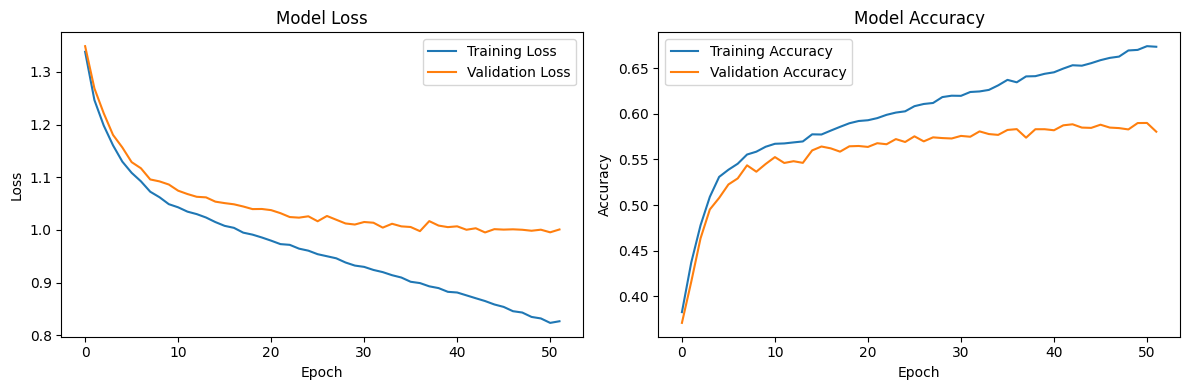

In [31]:
plot_training_history(model.history)